# ILN 2: POS Tagging

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\jmfel\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\jmfel\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


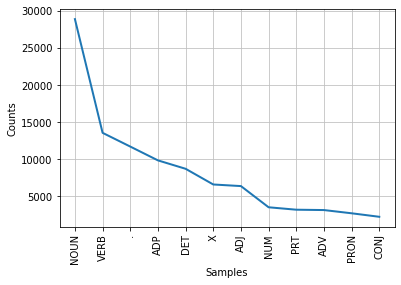

In [2]:
import pprint
import nltk
import matplotlib.pylab as plt
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.corpus import treebank
nltk.download('treebank')
nltk.download('universal_tagset')

tags = [tag for (word, tag) in treebank.tagged_words()]
masFTag = FreqDist(tags).max()
default_tagger = DefaultTagger(masFTag)



In [108]:
particiones = 10
parts = int(len(treebank.tagged_sents(tagset = 'universal'))/particiones)
tagged_splited_sents = zip(*[iter(treebank.tagged_sents(tagset = 'universal'))]*parts)

unigram_10 = 0
bigram_10 = 0
backoff_10 = 0

for tagged_sents in tagged_splited_sents:
    talla = int(len(tagged_sents) * 0.9)
    train_sents = tagged_sents[:talla]
    test_sents = tagged_sents[talla:]
    unigram_tagger = UnigramTagger(train_sents)
    bigram_tagger = BigramTagger(train_sents)

    unigram_10 = unigram_10 + round(unigram_tagger.evaluate(test_sents) * 100, 2)
    bigram_10 = bigram_10 + round(bigram_tagger.evaluate(test_sents) * 100, 2)
    print(bigram_10)
    backoff_tagger = BigramTagger(train_sents, backoff= unigram_tagger)
    backoff_10 = backoff_10 + round(backoff_tagger.evaluate(test_sents) * 100, 2);
    

print("Tasas de acierto:")
print("Unigramas: " + str(unigram_10/particiones) + "%")
print("Bigramas: " + str(bigram_10/particiones) + "%")
print("Bigramas - backoff: " + str(backoff_10/particiones) + "%")

5.41
13.41
18.87
24.130000000000003
30.1
37.94
44.82
50.62
56.3
63.33
Tasas de acierto:
Unigramas: 75.24199999999999%
Bigramas: 6.333%
Bigramas - backoff: 75.652%


In [109]:
from nltk.tokenize import word_tokenize

sent = "Are you exaggerating or have you got the wrong figures?"
sent = word_tokenize(sent)


tag = unigram_tagger.tag(sent)
tag2 = bigram_tagger.tag(sent)
tag3 = backoff_tagger.tag(sent)

pprint.pprint(tag)
pprint.pprint(tag2)
pprint.pprint(tag3)

[('Are', None),
 ('you', 'PRON'),
 ('exaggerating', None),
 ('or', 'CONJ'),
 ('have', 'VERB'),
 ('you', 'PRON'),
 ('got', None),
 ('the', 'DET'),
 ('wrong', None),
 ('figures', 'NOUN'),
 ('?', '.')]
[('Are', None),
 ('you', None),
 ('exaggerating', None),
 ('or', None),
 ('have', None),
 ('you', None),
 ('got', None),
 ('the', None),
 ('wrong', None),
 ('figures', None),
 ('?', None)]
[('Are', None),
 ('you', 'PRON'),
 ('exaggerating', None),
 ('or', 'CONJ'),
 ('have', 'VERB'),
 ('you', 'PRON'),
 ('got', None),
 ('the', 'DET'),
 ('wrong', None),
 ('figures', 'NOUN'),
 ('?', '.')]
